In [2]:
%load_ext autoreload

# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



El valor de h es 0.1


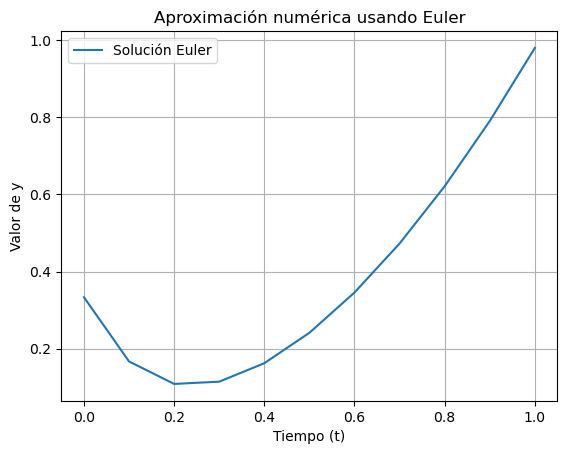

In [ ]:
%autoreload 2
from src import ODE_euler
import matplotlib.pyplot as plt

# Definición de la función de la ecuación diferencial
def f(t, y):
    return -5*y + 5*t**2 + 2*t

# Parámetros de la EDO
a = 0  # Tiempo inicial
b = 1  # Tiempo final
y_t0 = 1/3  # Valor inicial de y
N = 10  # Número de pasos de malla

# Resolver la ecuación diferencial con el método de Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Mostrar el valor de h
print(f"El valor de h es {h}")

# Graficar la solución obtenida
plt.plot(ts, ys, label="Solución Euler")
plt.xlabel("Tiempo (t)")
plt.ylabel("Valor de y")
plt.title("Aproximación numérica usando Euler")
plt.legend()
plt.grid(True)
plt.show()


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



El valor de h es 0.1


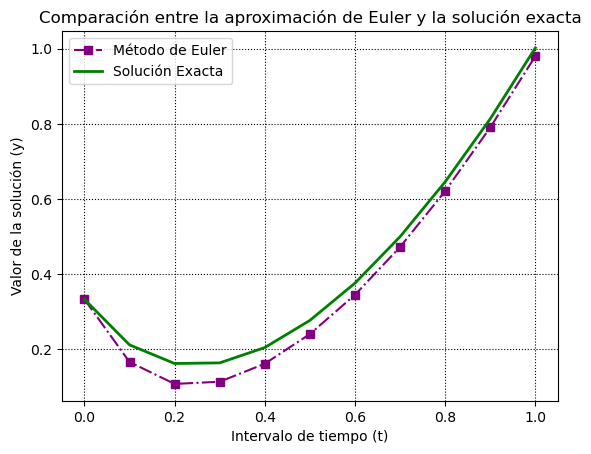

In [ ]:
%autoreload 2
from src import ODE_euler
import numpy as np
import matplotlib.pyplot as plt

# Función de la ecuación diferencial
def f(t, y):
    return -5*y + 5*t**2 + 2*t

# Solución exacta de la EDO
def solucion_real(t):
    return t**2 + (1/3) * np.exp(-5*t)

# Parámetros del problema
a = 0  # Tiempo inicial
b = 1  # Tiempo final
y_t0 = 1/3  # Condición inicial
N = 10  # Número de pasos

# Resolver la ecuación diferencial usando el método de Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Evaluar la solución real
ys_real = [solucion_real(t) for t in ts]

# Mostrar el valor de h
print(f"El valor de h es {h}")

# Graficar la aproximación y la solución exacta
plt.plot(ts, ys, label="Método de Euler", color='purple', linestyle='-.', marker='s', markersize=6)
plt.plot(ts, ys_real, label="Solución Exacta", color='green', linestyle='-', linewidth=2)
plt.xlabel("Intervalo de tiempo (t)")
plt.ylabel("Valor de la solución (y)")
plt.title("Comparación entre la aproximación de Euler y la solución exacta")
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle=':', color='black')
plt.show()


# Errores
Calcule el eeror relativo para diferentes valores de N.

Para N = 10:
  El valor de h es 0.1
  El error relativo es 0.1290954106813849
Para N = 5:
  El valor de h es 0.2
  El error relativo es 0.2797909081673575
Para N = 20:
  El valor de h es 0.05
  El error relativo es 0.0631456968405627


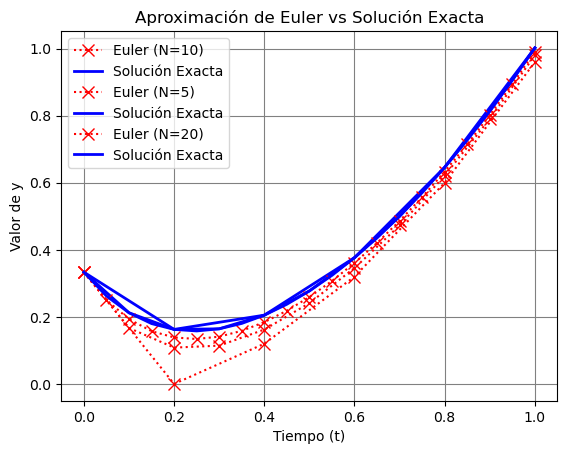

In [8]:
%autoreload 2
from src import ODE_euler
import numpy as np
import matplotlib.pyplot as plt

# Ecuación diferencial
def f(t, y):
    return -5*y + 5*t**2 + 2*t

# Solución exacta de la ecuación
def solucion_real(t):
    return t**2 + (1/3) * np.exp(-5*t)

# Función para calcular el error relativo
def calcular_error_relativo(ys_aprox, ys_real):
    return np.mean([abs(y_aprox - y_real) / abs(y_real) for y_aprox, y_real in zip(ys_aprox, ys_real)])

# Parámetros de la ecuación
a = 0  # Tiempo inicial
b = 1  # Tiempo final
y_t0 = 1/3  # Condición inicial

# Diferentes valores de N a evaluar
valores_N = [10, 5, 20]

# Resolver y graficar para cada valor de N
for N in valores_N:
    # Resolver la EDO usando el método de Euler
    ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

    # Calcular la solución exacta en los puntos de malla
    ys_real = [solucion_real(t) for t in ts]

    # Calcular el error relativo
    error_relativo = calcular_error_relativo(ys, ys_real)

    # Mostrar los resultados
    print(f"Para N = {N}:")
    print(f"  El valor de h es {h}")
    print(f"  El error relativo es {error_relativo}")

    # Graficar resultados
    plt.plot(ts, ys, label=f"Euler (N={N})", linestyle=':', color='red', marker='x', markersize=8)
    plt.plot(ts, ys_real, label="Solución Exacta", linestyle='-', color='blue', linewidth=2)

# Personalizar la gráfica
plt.xlabel("Tiempo (t)")
plt.ylabel("Valor de y")
plt.title("Aproximación de Euler vs Solución Exacta")
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='-', color='gray')
plt.show()
